# **Preparation**
Within preparation we'll install PyDrive, to connect our drive with Google Colaboratory. Then we mount our drive in Google Colaboratory, so we can access our file from drive in Google Colaboratory. After that we should create directory, where our file or data was saved. After finished it, we can import the libraries we need like numpy, pandas, matplotlib, etc.

In [1]:
#Install Python Drive
!pip install -U -q PyDrive

In [2]:
#Mount drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Create directory pada FGA_Data_Science
%cd /content/drive/My Drive/FGA_Data_Science

/content/drive/My Drive/FGA_Data_Science


In [4]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [6]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

# **Load Data**
Here we'll load our data and save it as dataframe. We'll try to get some insight from employee attrition in IBM. The last data was updated 4 years ago. We get the data from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [8]:
HR_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# **Data Pre-Processing**
We will pre-process the data to check if there are some errors in our data such as missing values, errors formatting, etc.

In [9]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
HR_df.shape

(1470, 35)

In [11]:
HR_df.isnull().values.any()

False

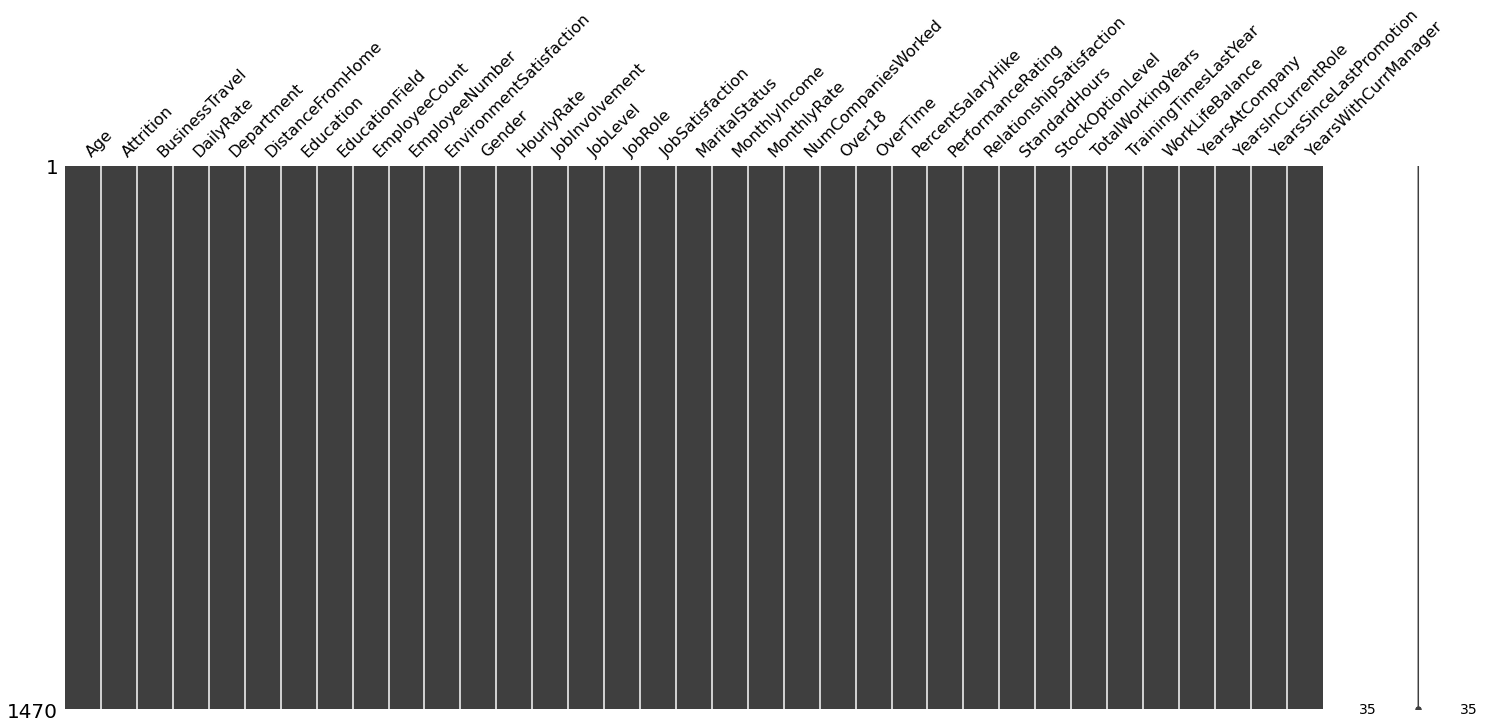

In [12]:
msno.matrix(HR_df)

In [13]:
#Drop useless information
HR_df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis="columns", inplace=True)
HR_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [14]:
HR_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [15]:
categories_col = []
for column in HR_df.columns:
    if HR_df[column].dtype == object and len(HR_df[column].unique()) <= 50:
        categories_col.append(column)
        print(f"{column} : {HR_df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [16]:
object_df = HR_df.loc[:,(categories_col)]
object_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [17]:
object_name = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
object_name

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [18]:
pd.set_option("display.float_format", "{:.2f}".format)
HR_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [19]:
attrition = HR_df['Attrition'].value_counts()
attrition

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
HR_df['Attrition'].dtypes

dtype('O')

# **Data Analysis and Visualization**
After we checked and make sure that our data is good. Now we'll try to analyze and visualize the data to get some informations from it.

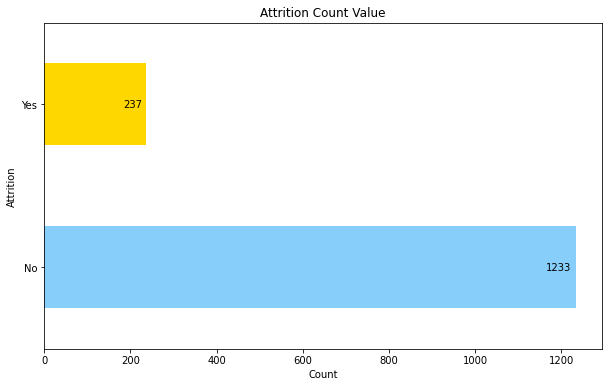

In [21]:
# Plot with bar chart
attrition.plot(kind='barh', figsize=(10,6), color=['lightskyblue', 'gold'], grid=False)

plt.xlabel('Count')
plt.ylabel('Attrition')
plt.title('Attrition Count Value')

for index, value in enumerate(attrition):
    label = str(round(value,2))
    plt.annotate(label, xy=(value-10, index), ha='right', va='center')

plt.show()

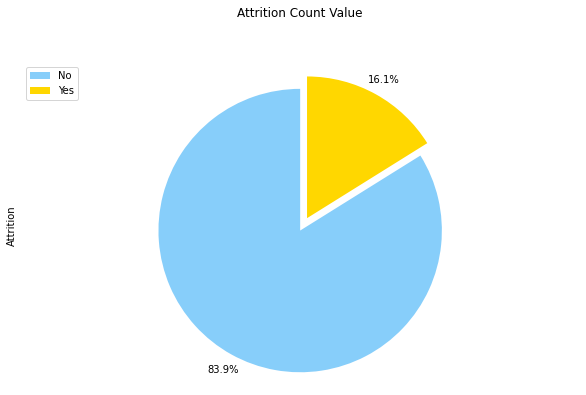

In [22]:
# Plot with pie chart
attrition.plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,      
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            colors=['lightskyblue', 'gold'],
                            explode=[0.1, 0]             # 'explode' yes value
                            )

# scale the title up by 12% to match pctdistance
plt.title('Attrition Count Value', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=attrition.index, loc='upper left') 

plt.show()

## **Information**
As we can see in the bar graph, actually employee attrition isn't very high, only 237 people. Or we can see in the pie chart it can be concluded that only 16.1% of the total 100% employees.

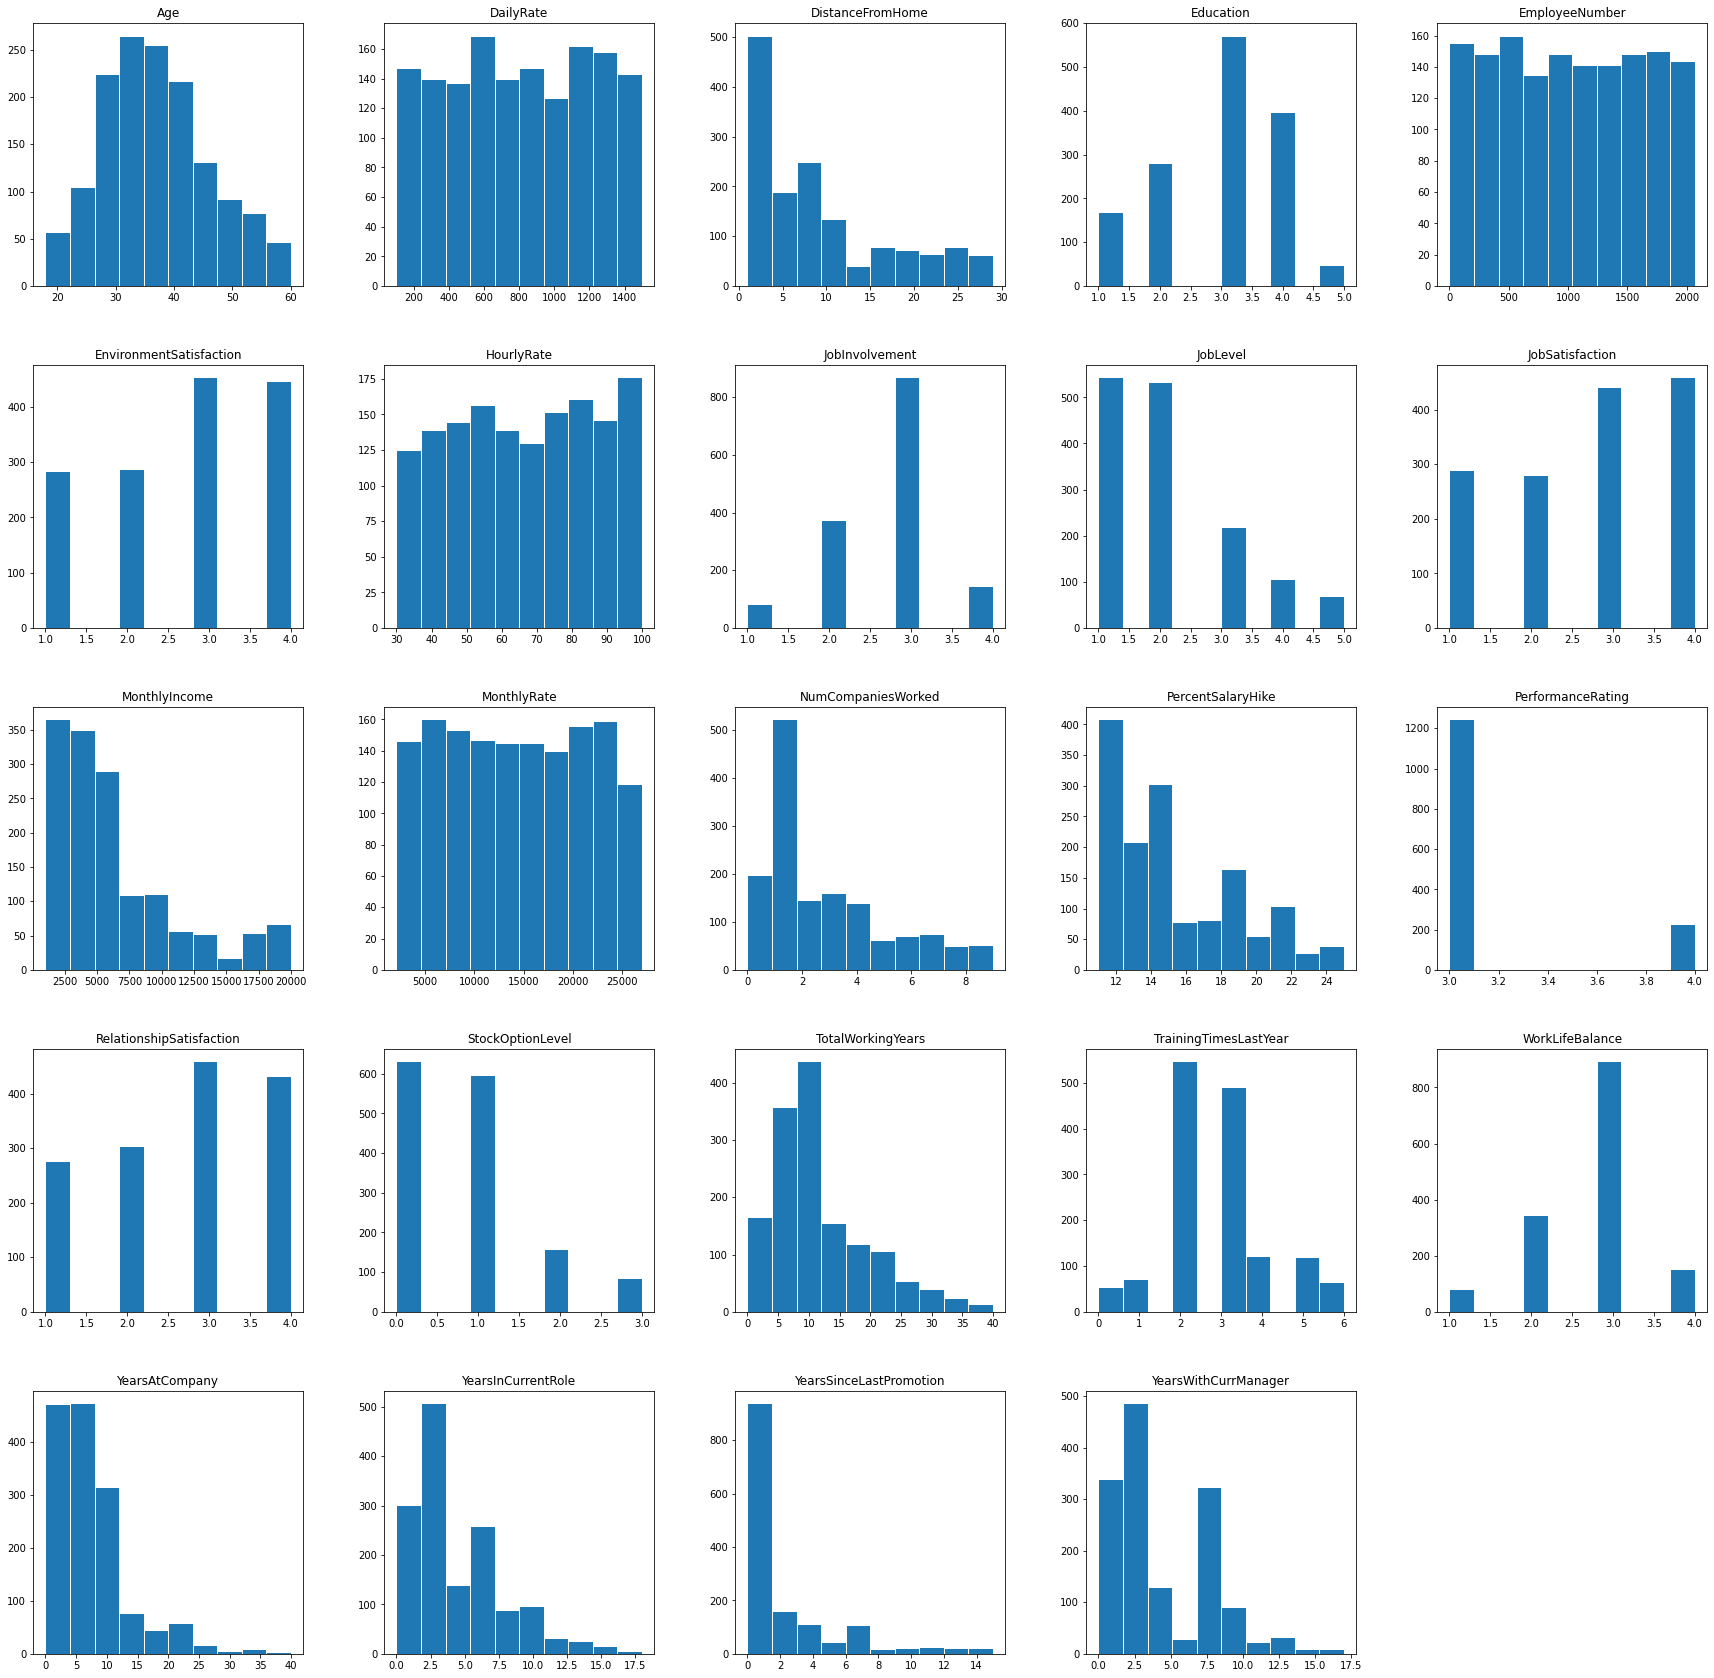

In [23]:
# Visualizing the distibution of the data for every feature
HR_df.hist(edgecolor='white', linewidth=1, figsize=(30, 30), grid=False);
plt.show()

## **Correlation Matrix**
Then we'll use the correlation matrix to find the correlation between employee attrition and the factors behind it.

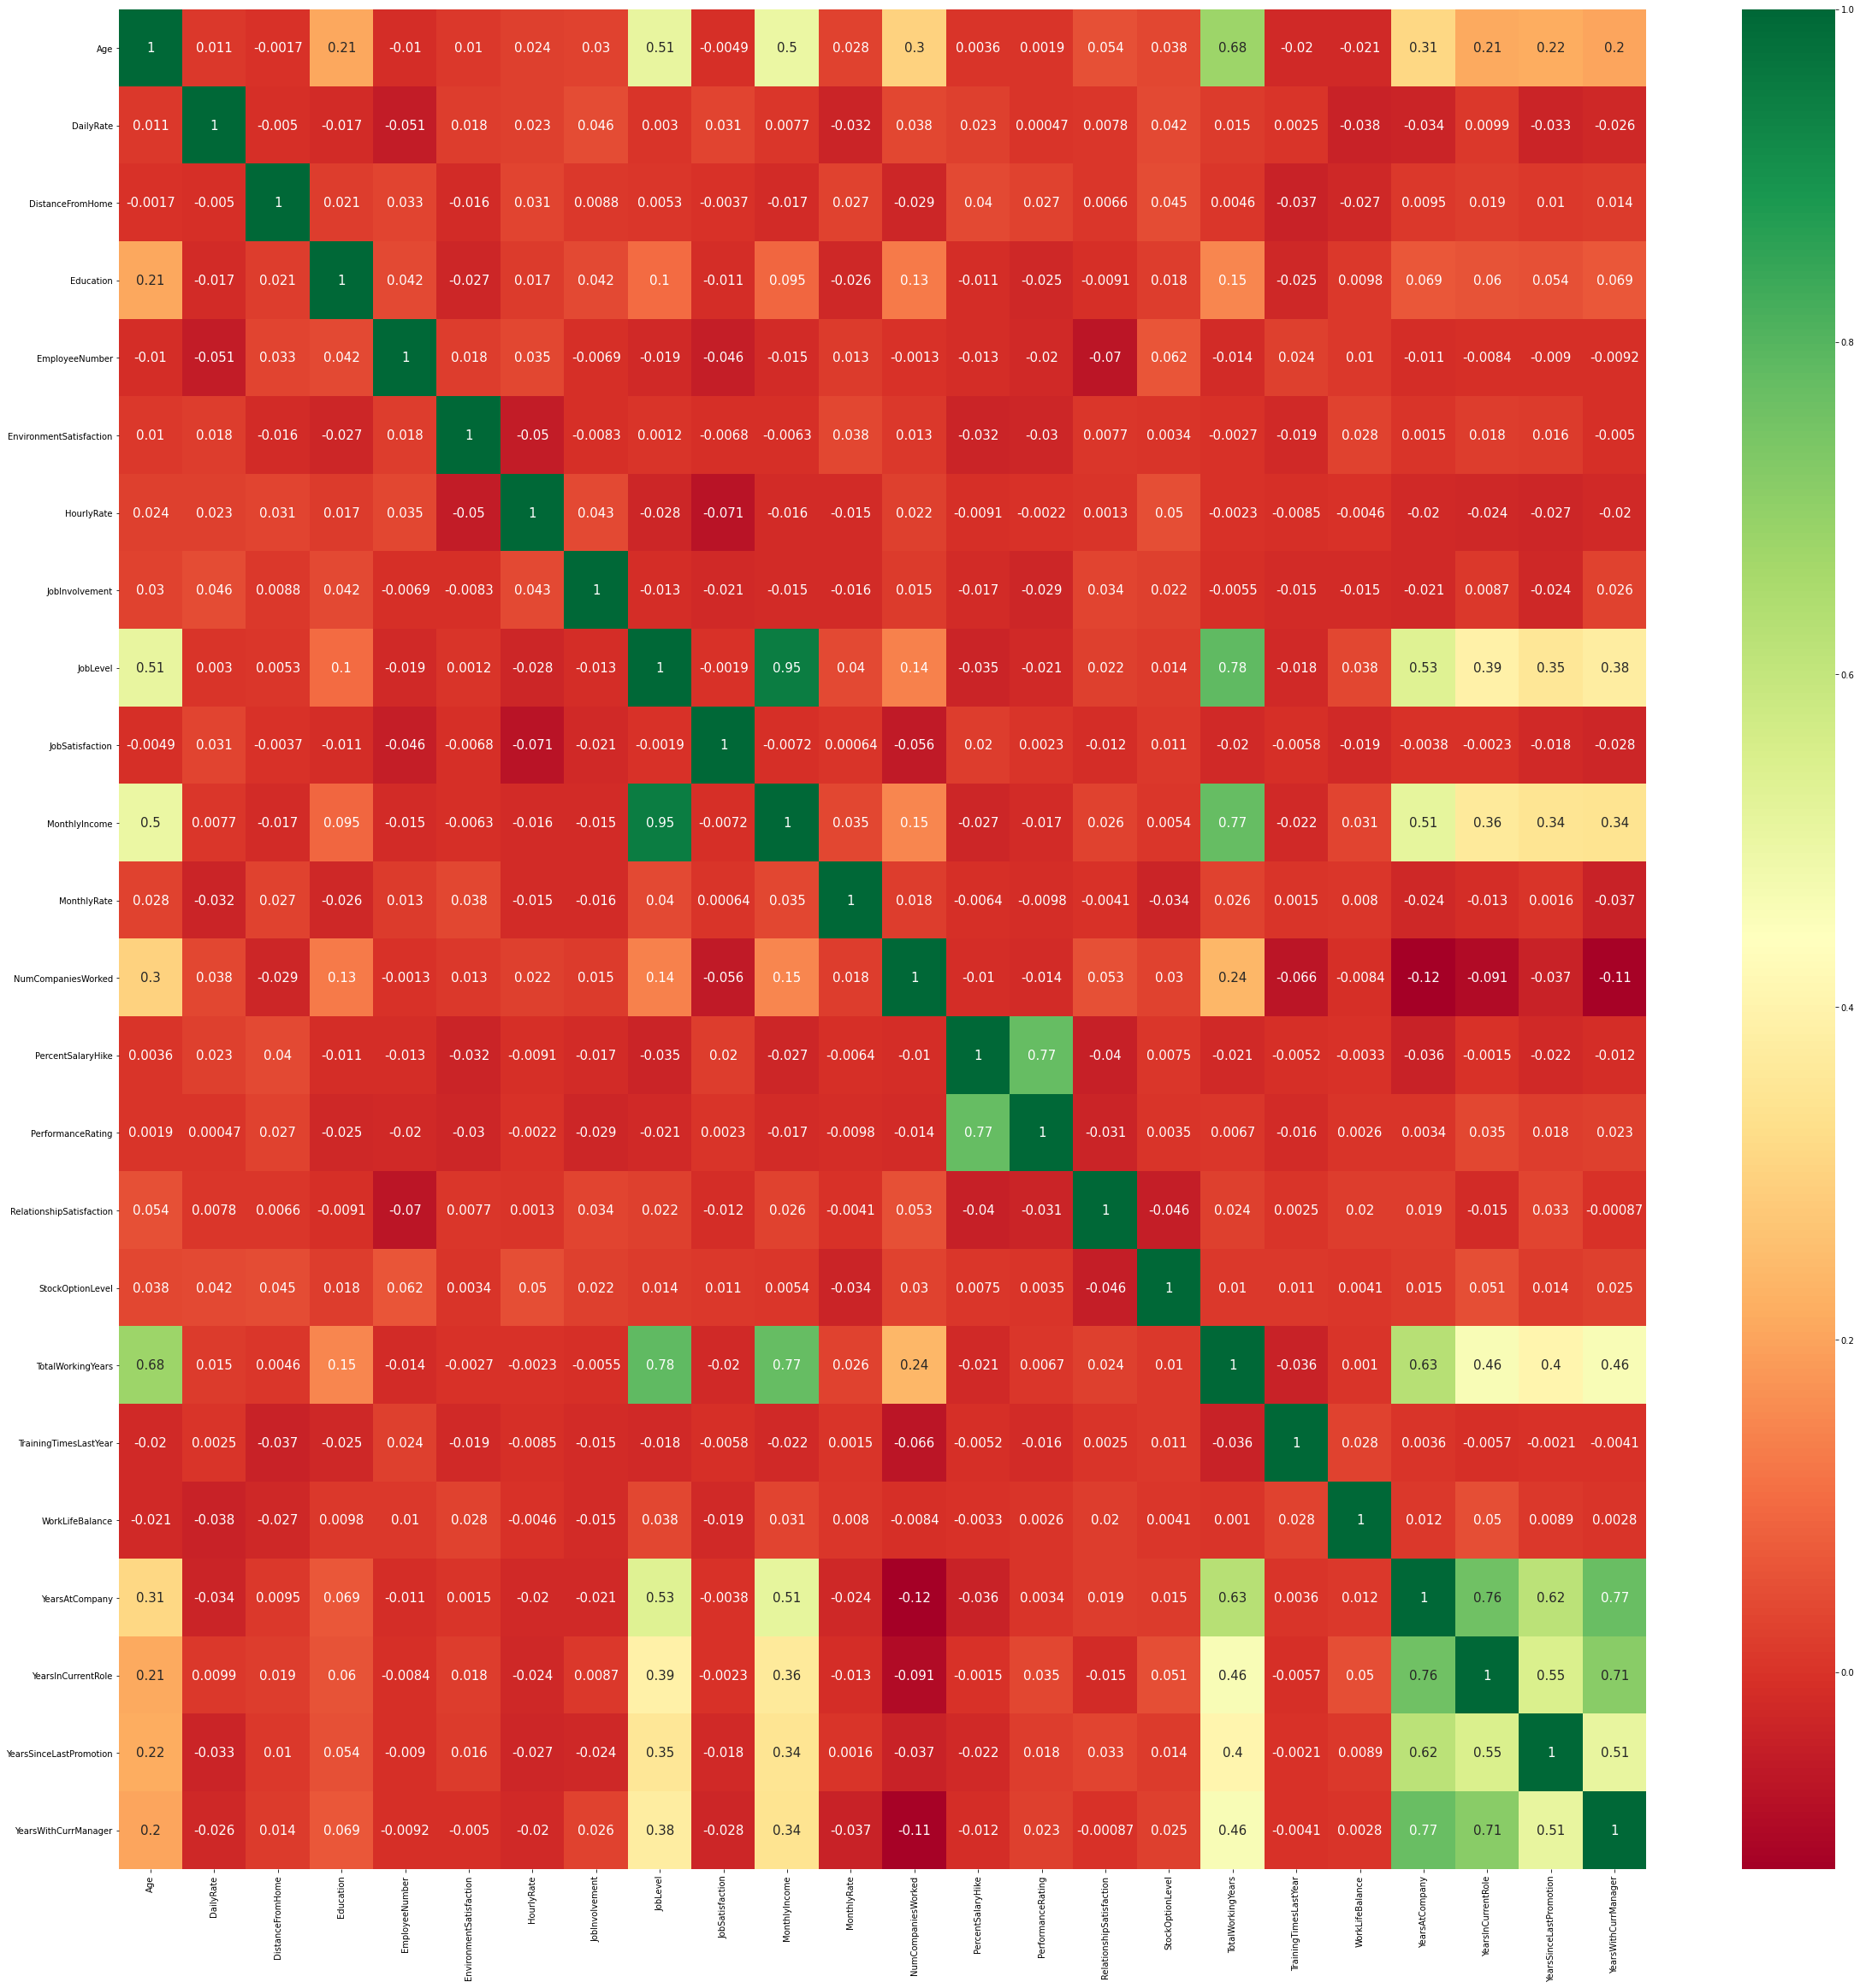

In [24]:
plt.figure(figsize=(40, 40))
sns.heatmap(HR_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

##**Information**
As we can see in the heatmap chart above **Job Level** have high correlation with **Monthly Income (0.95)**. **Job Level** also have high correlation with **Total Working Years (0.78)**.

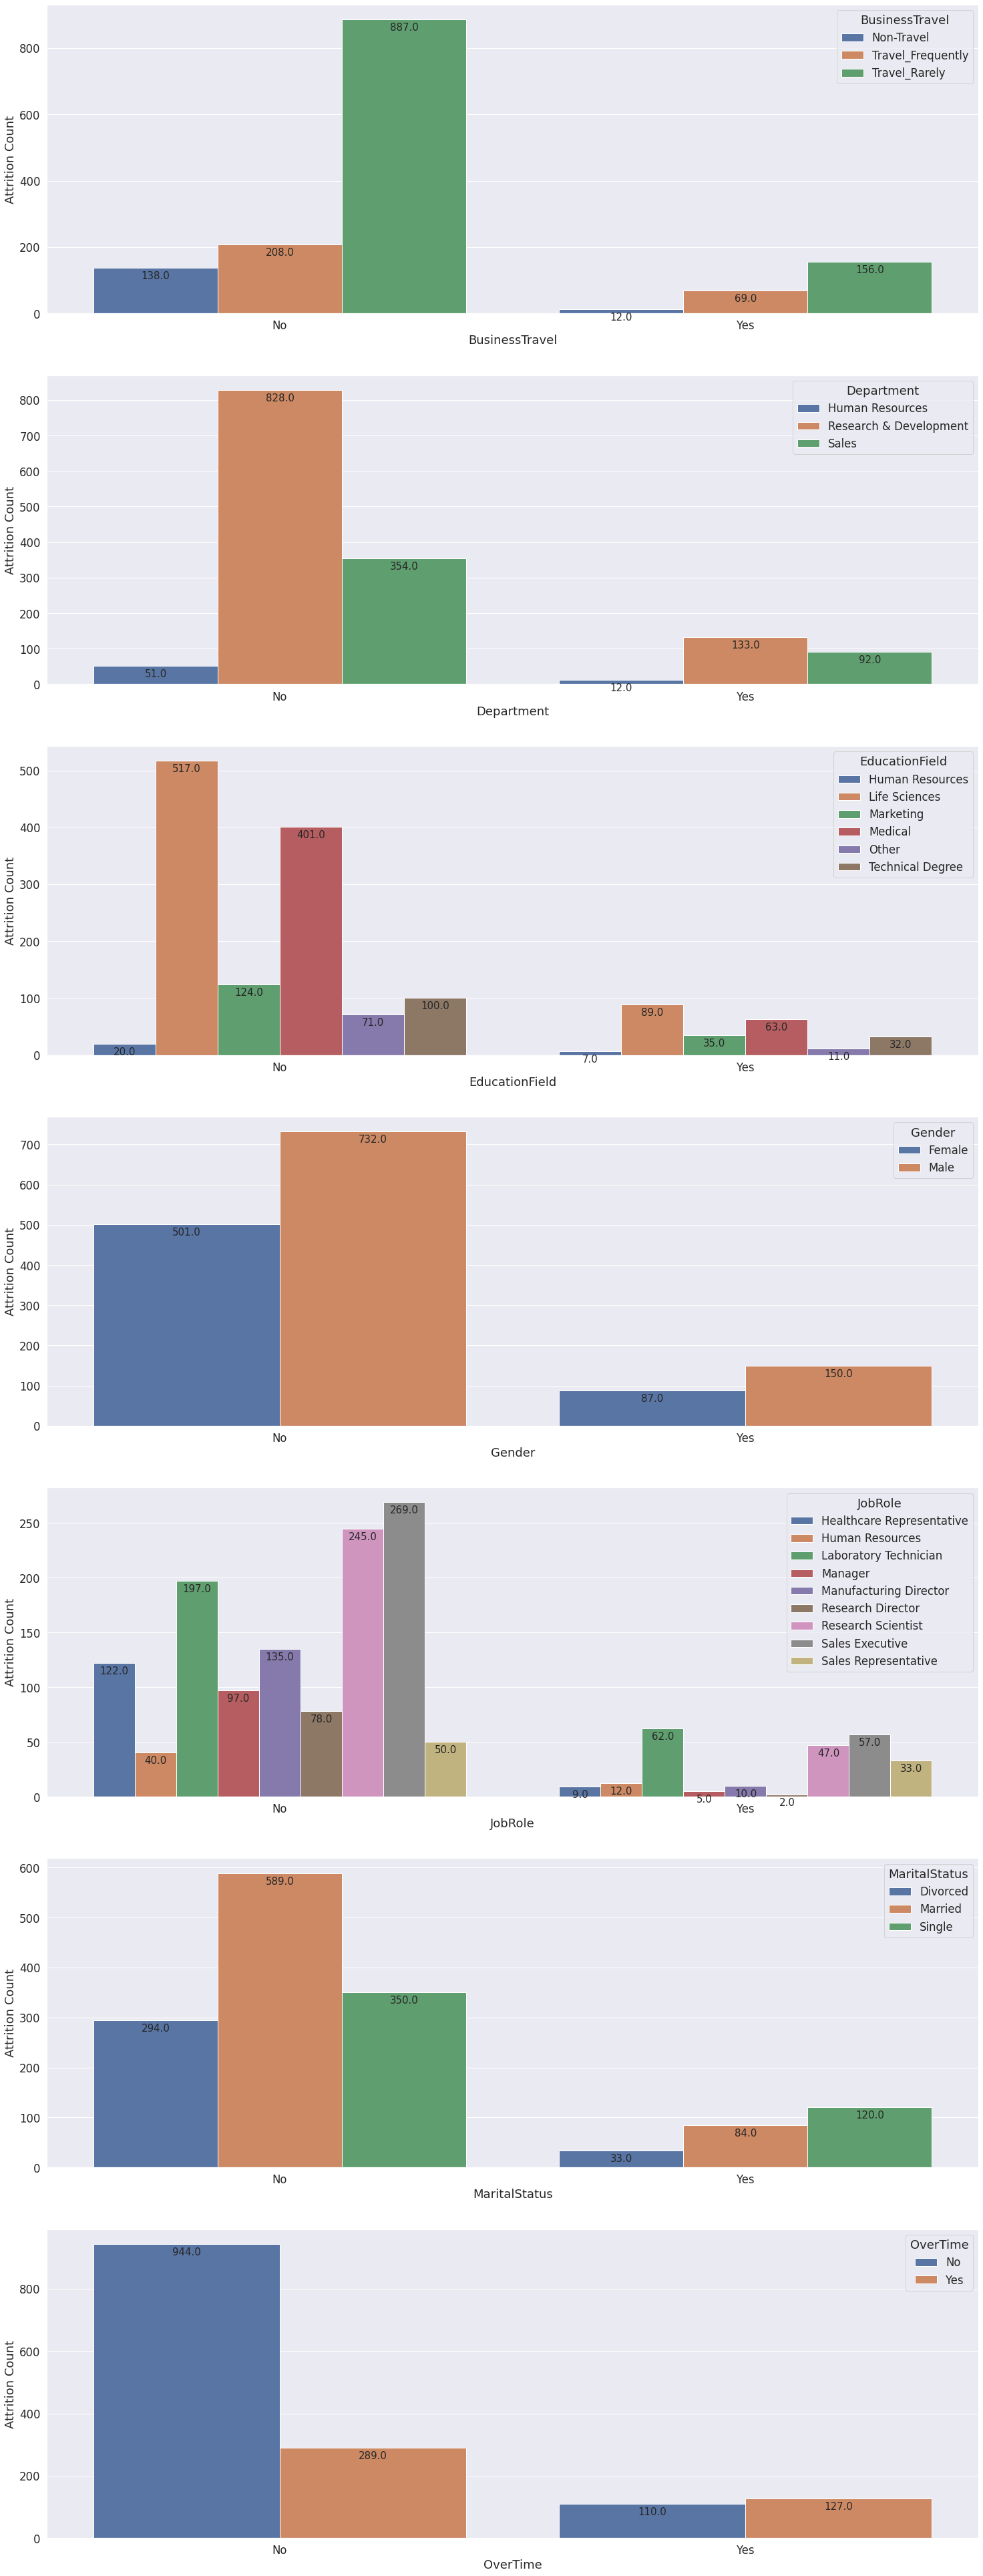

In [25]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.5)
plt.figure(figsize=(25, 80))

for i, column in enumerate(object_name, 1):
    c = pd.DataFrame(object_df.groupby(['Attrition',column])['Attrition'].count())
    c.columns=['Count']
    c.reset_index(inplace=True)

    plt.subplot(8,1,i)
    g = sns.barplot(data = c, x=f'Attrition', y='Count', hue=f'{column}')
    g.set_xticklabels(g.get_xticklabels(), rotation=0)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', size=15,
                   xytext=(0, -12), textcoords = 'offset points')
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')
plt.show()

## **Information**
From chart above, we can conclude that:
*   **BusinessTravel Chart:** Employees who **travel rarely** are more likely to quit the job than other employees. **(156 employees)**
*   **Department Chart:** Employees in **Research & Development** are more likely to quit the job than employees in other departments. **(133 employees)**
*   **EducationField Chart:** Employees from **Life Science** Degree are more likely to quit the job than employees from other fields of educations. **(89 employees)**
*   **Gender Chart:** **Male** employees are more likely to quit the job than **female** employees. **(150 employees)**
*   **JobRole Chart:** Employees who have roles as **Laboratory Technician** are more likely to quit the job than employees in other roles. **(62 employees)**
*   **MaritalStatus Chart:** **Unmarried** employees are more likely to quit the job than employees who have **married** or **divorce**. **(120 employees)**
*   **OverTime Chart:** Employees who work **overtime** are more likely to quit the job than other employess employees. **(127 employees)**


In [26]:
numeric_col = []
for column in HR_df.columns:
    if HR_df[column].dtypes != object and HR_df[column].nunique() < 30:
        print(f"{column} : {HR_df[column].unique()}")
        numeric_col.append(column)
        print("-------------------------------")

DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
-------------------------------
Education : [2 1 4 3 5]
-------------------------------
EnvironmentSatisfaction : [2 3 4 1]
-------------------------------
JobInvolvement : [3 2 4 1]
-------------------------------
JobLevel : [2 1 3 4 5]
-------------------------------
JobSatisfaction : [4 2 3 1]
-------------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
-------------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
-------------------------------
PerformanceRating : [3 4]
-------------------------------
RelationshipSatisfaction : [1 4 2 3]
-------------------------------
StockOptionLevel : [0 1 3 2]
-------------------------------
TrainingTimesLastYear : [0 3 2 5 1 4 6]
-------------------------------
WorkLifeBalance : [1 3 2 4]
-------------------------------
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 

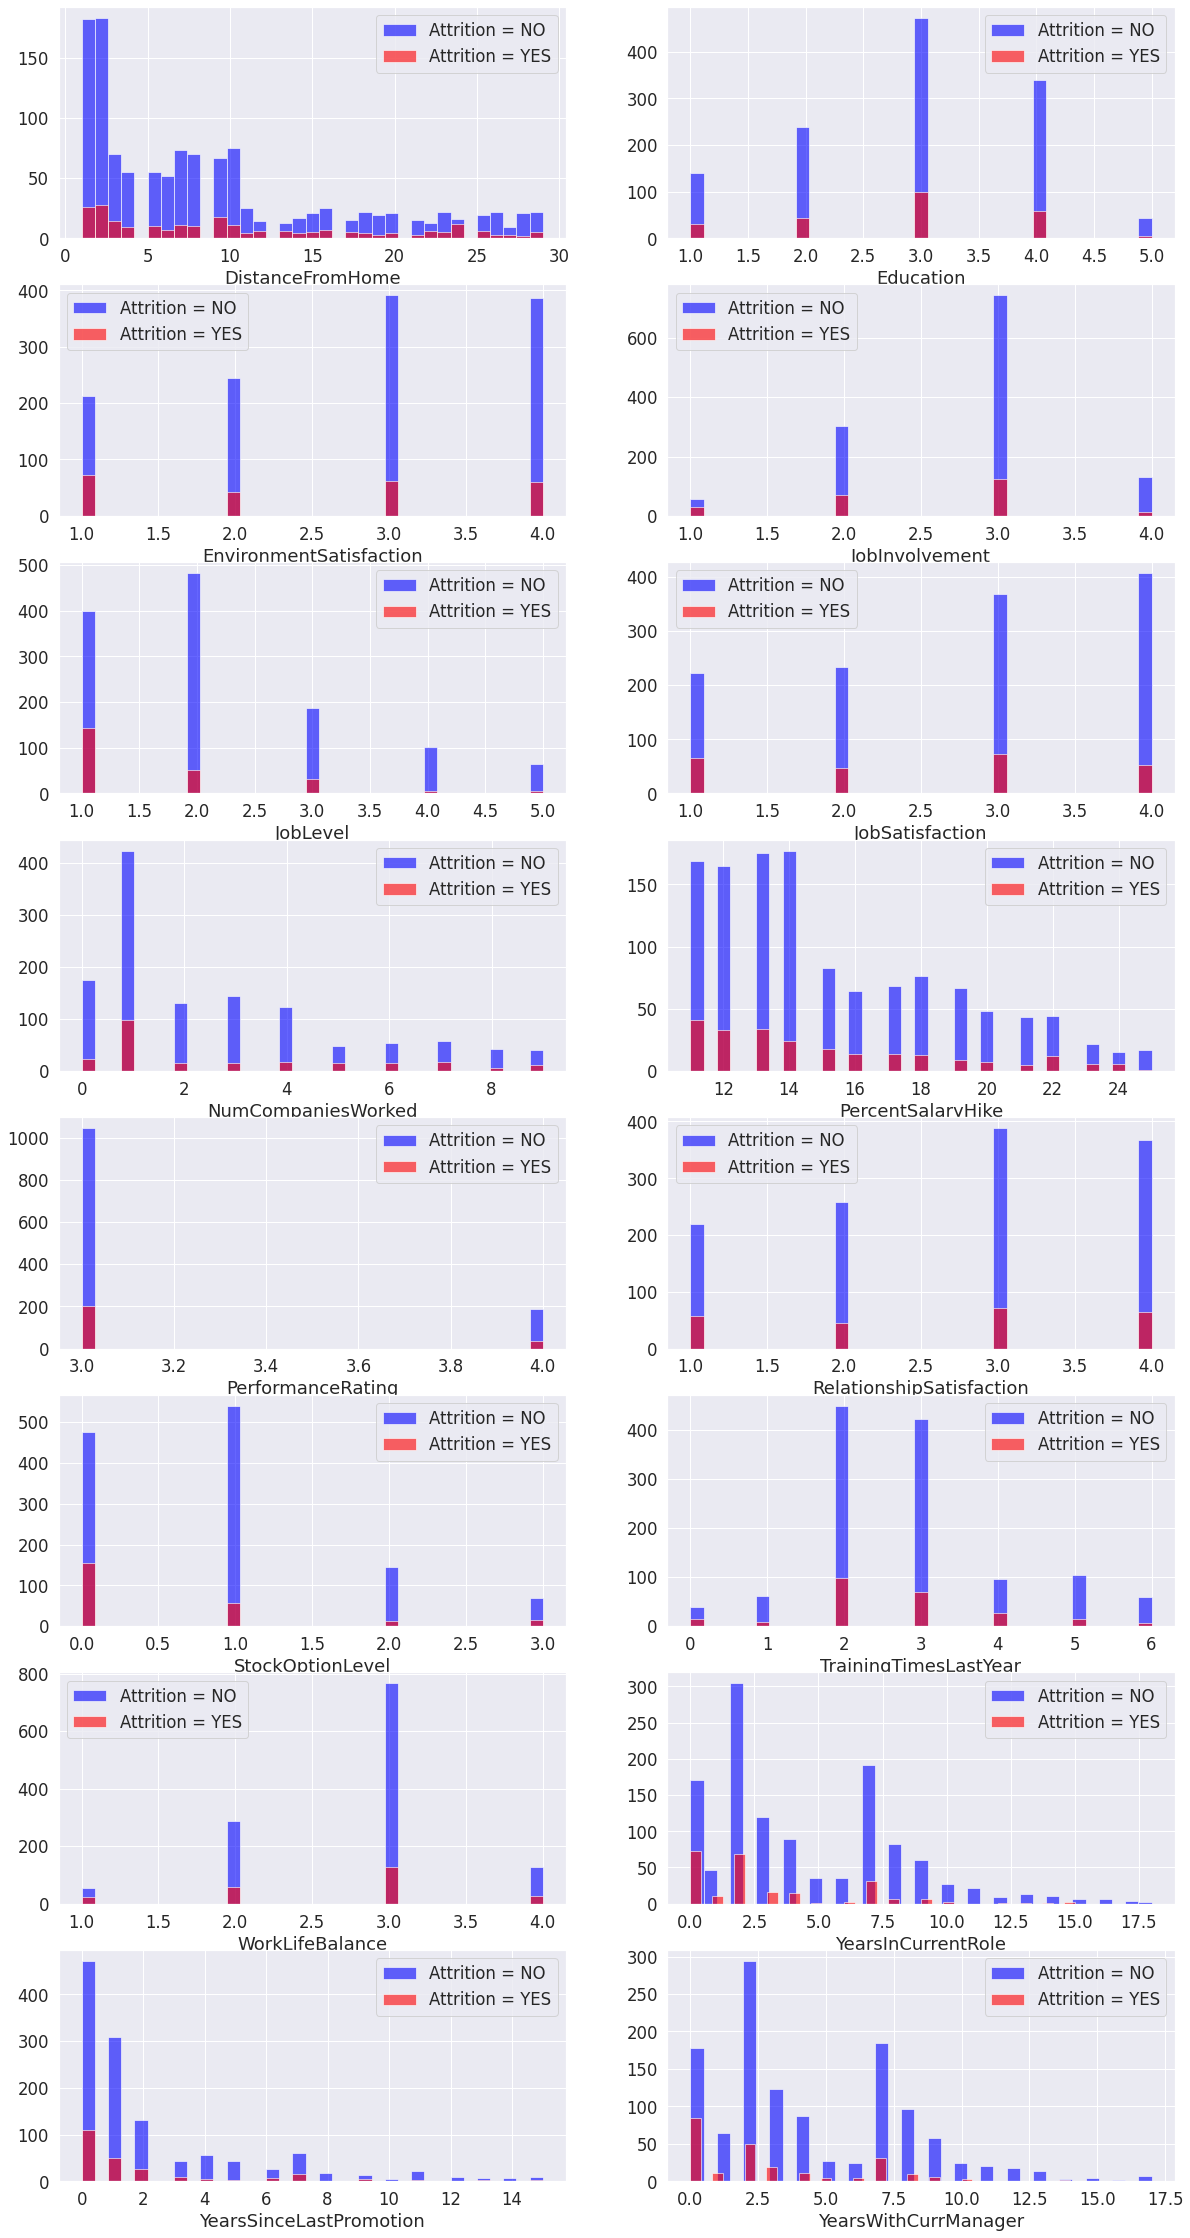

In [27]:
# Plotting how every feature correlate with the "target"
HR_df['Attrition'].replace({'No':0,'Yes':1}, inplace=True)
plt.figure(figsize=(20, 40))

for i, column in enumerate(numeric_col, 1):
    plt.subplot(8, 2, i)
    HR_df[HR_df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    HR_df[HR_df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.show()

In [28]:
numeric2_col = []
for column in HR_df.columns:
    if HR_df[column].dtypes != object and HR_df[column].nunique() > 30:
        print(f"{column} : Minimum: {HR_df[column].min()}, Maximum: {HR_df[column].max()}")
        numeric2_col.append(column)
        print("--------------------------------")

Age : Minimum: 18, Maximum: 60
--------------------------------
DailyRate : Minimum: 102, Maximum: 1499
--------------------------------
EmployeeNumber : Minimum: 1, Maximum: 2068
--------------------------------
HourlyRate : Minimum: 30, Maximum: 100
--------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
--------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
--------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
--------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
--------------------------------


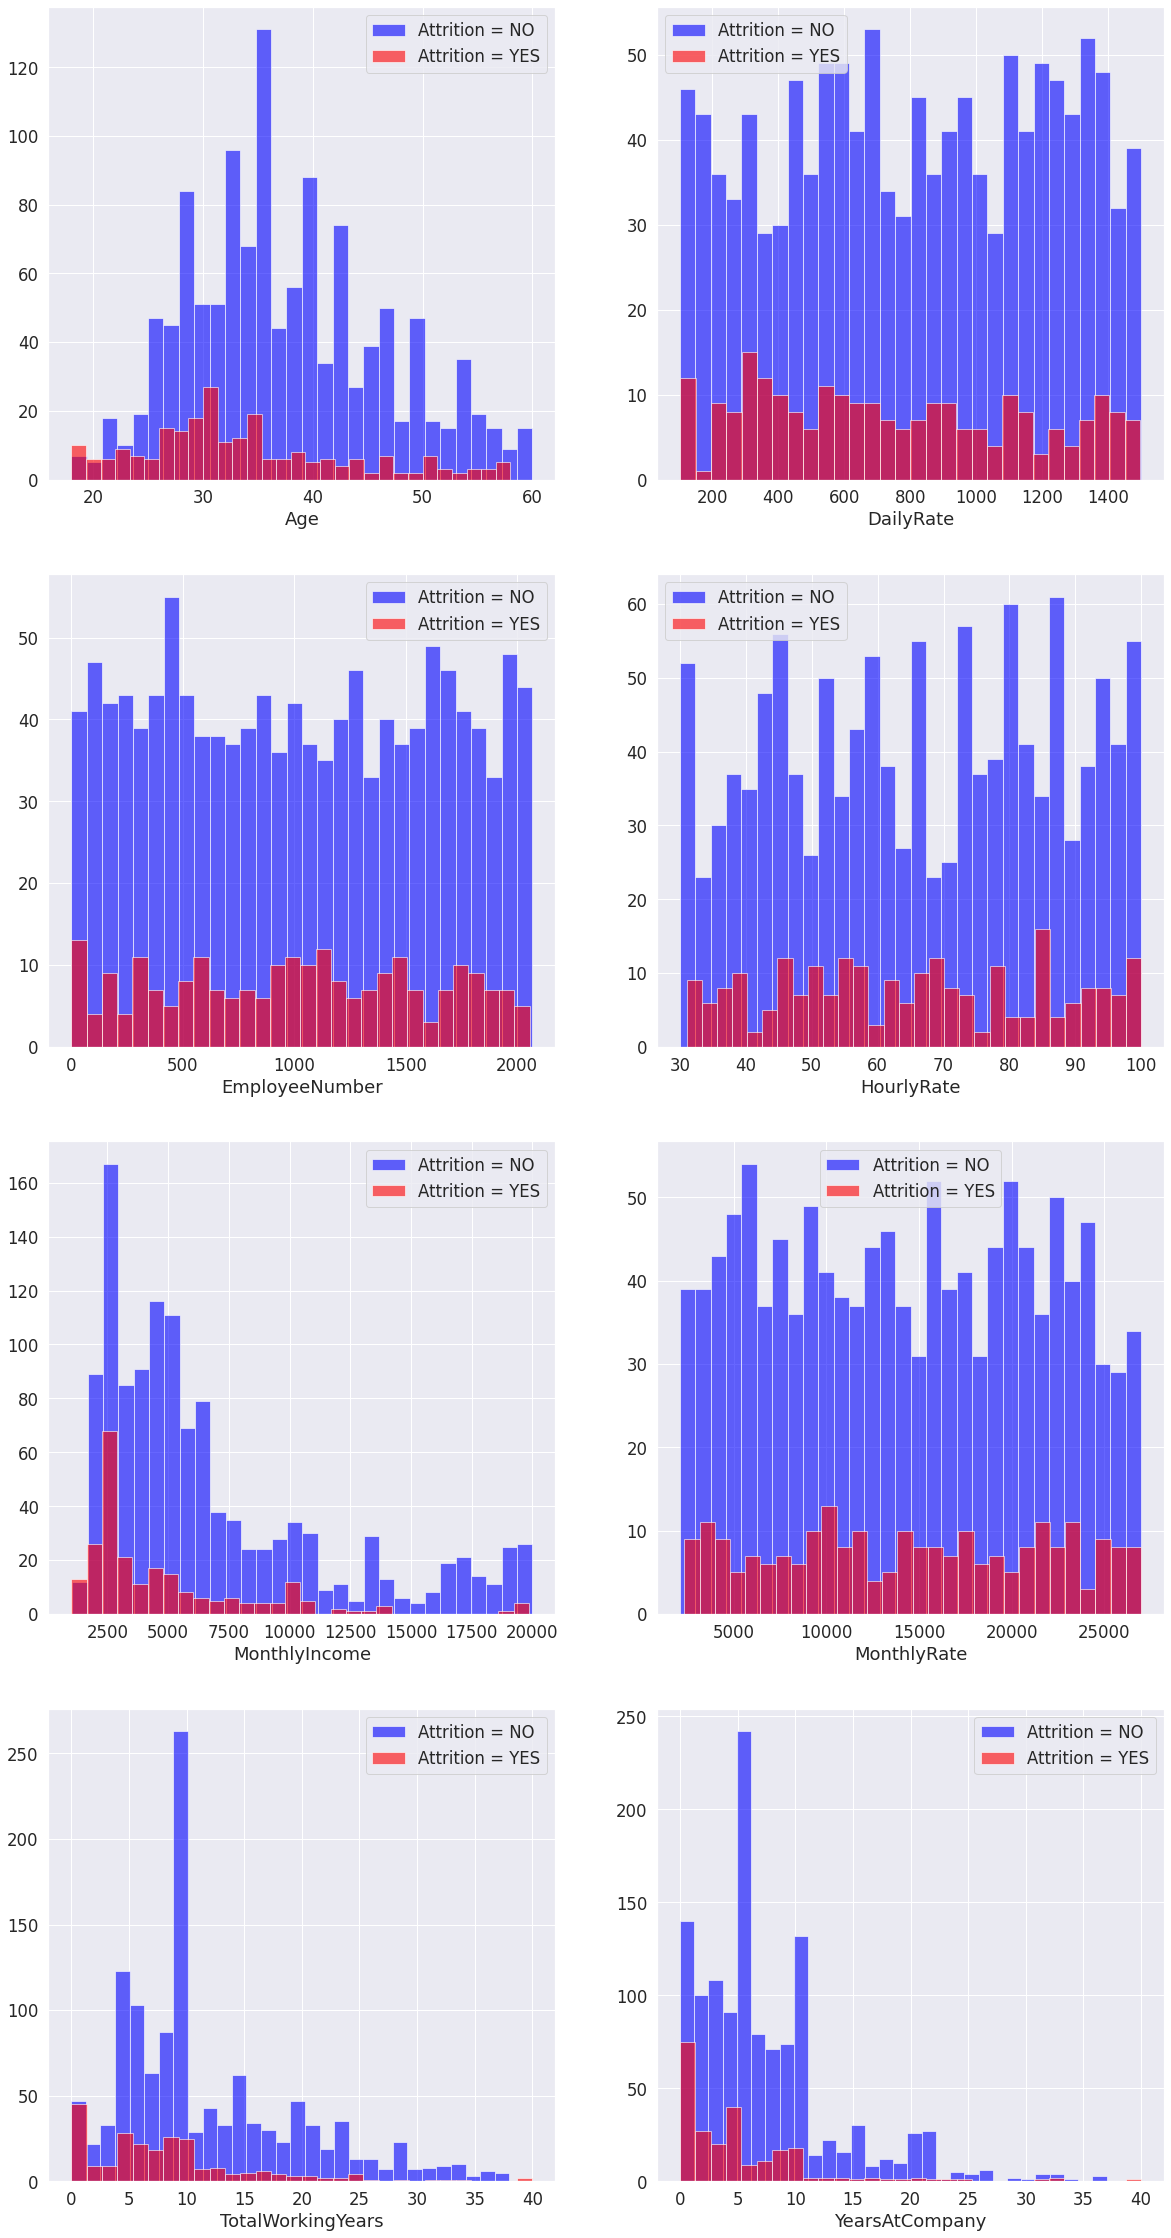

In [29]:
plt.figure(figsize=(20, 40))

for i, column in enumerate(numeric2_col, 1):
    plt.subplot(4, 2, i)
    HR_df[HR_df["Attrition"] == 0][column].hist(bins=30, color='blue', label='Attrition = NO', alpha=0.6)
    HR_df[HR_df["Attrition"] == 1][column].hist(bins=30, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

plt.show()

## **Information**
From chart above, we can conclude that:
*   **Job Level Chart**, **Performance Level**, and **Stok Option Level Chart** give the most impact for employee attrition (more than **100** employee left)

# **Data Modeling**
After we analyze and visualize the data, we'll try to modelling the data using machine learning. We'll try to classify our data using **Desicion Tree** and **SVM**. We'll split the data into **train data 80%** and **test data 20%**

In [30]:
# delete attrition column from categories_col
categories_col.remove('Attrition')

In [31]:
#Change all element in HR_df as numeric
label = LabelEncoder()
for column in categories_col:
    HR_df[column] = label.fit_transform(HR_df[column])

In [32]:
#Drop Attrition from HR_df, because Attrition is the target (y)
X = HR_df.drop('Attrition', axis=1)
y = HR_df.Attrition
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeNumber            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [33]:
#Class to print output score from training and testing, we'll call the class when we finished the train and test
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    labels = ['Yes', 'No']
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [34]:
#Split the data for train and test, 80% data for train and 20% data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Classification using Decision Tree**

In [35]:
#Start train and test for the data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[978   0]
 [  0 198]]

Test Result:
accuracy score: 0.7585034013605442

Classification Report: 
 	Precision: 0.11904761904761904
	Recall Score: 0.1282051282051282
	F1 score: 0.12345679012345678

Confusion Matrix: 
 [[218  37]
 [ 34   5]]



In [36]:
features = list(HR_df.columns)
features.remove("Attrition")

In [37]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('desicion_tree_non.png')
Image(graph[0].create_png())

Output hidden; open in https://colab.research.google.com to view.

In [38]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [39]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [41]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8895

Classification Report: 
 	Precision: 0.7741935483870968
	Recall Score: 0.48484848484848486
	F1 score: 0.5962732919254659

Confusion Matrix: 
 [[950  28]
 [102  96]]

Test Result:
accuracy score: 0.8503401360544217

Classification Report: 
 	Precision: 0.3684210526315789
	Recall Score: 0.1794871794871795
	F1 score: 0.2413793103448276

Confusion Matrix: 
 [[243  12]
 [ 32   7]]



In [42]:
features = list(HR_df.columns)
features.remove("Attrition")

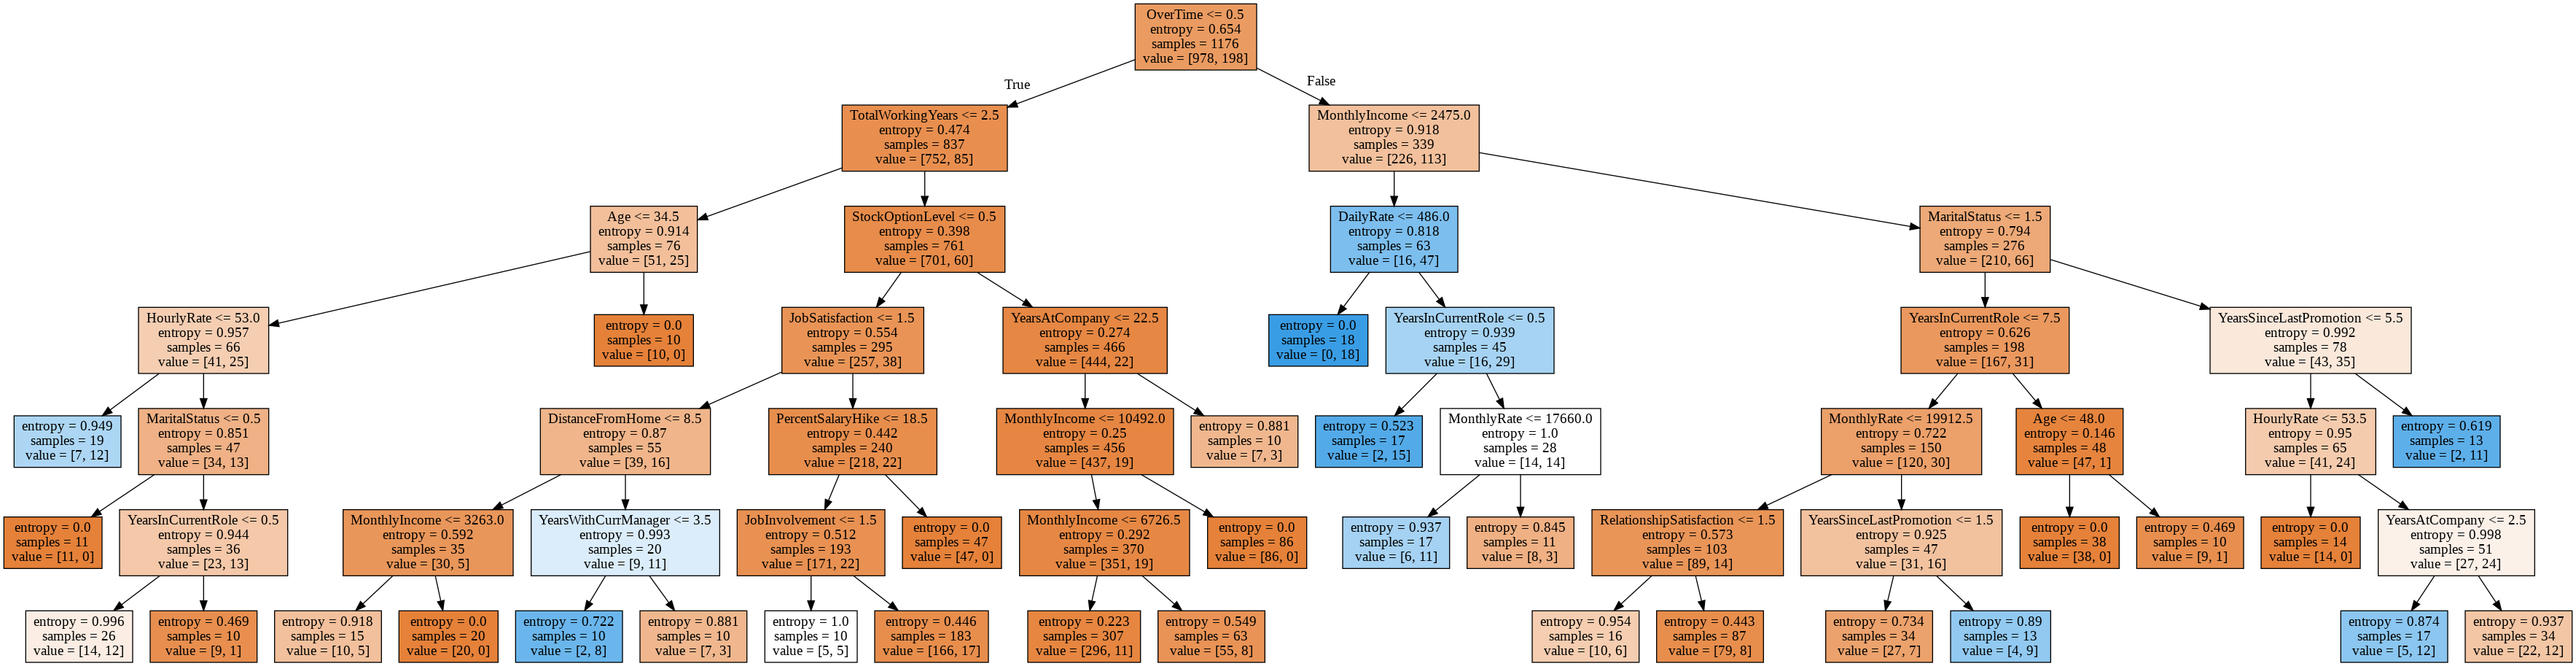

In [43]:
#show decision tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('desicion_tree.png')
Image(graph[0].create_png())

##**Information**
As we can see when we train our data using the **Decision Tree**, accuracy (1.0), precision (1.0), recall (1.0), and F1 (1.0) scores appear to be excellent. But after we tested our data, we could see that accuracy (0.76), precision (0.11), recall (0.13), and F1 score (0.12). It's not as good as the training results. Then we try to set the parameters to use in the **Decision Tree**. It can be seen that the accuracy of the training results (0.89), precision (0.77), recall (0.48), and the F1 score (0.59) seems to be less good. But after we tested our data, we could see that the accuracy (0.85), precision (0.37), recall (0.18), and F1 score (0.24) turned out to be better than before. So we can conclude that the **Decision Tree using Parameter Tunning** is better, but not the best for our data. So we tried to use **SVM**.

# **Classification using SVM**

In [44]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
yhat = clf.predict(X_test)
print('predict:', yhat[0:5])
print('actual:', y_test[0:5])

predict: [0 0 0 0 0]
actual: 1041    0
184     0
1222    1
67      0
220     0
Name: Attrition, dtype: int64


In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Confusion matrix, without normalization
[[255   0]
 [ 39   0]]


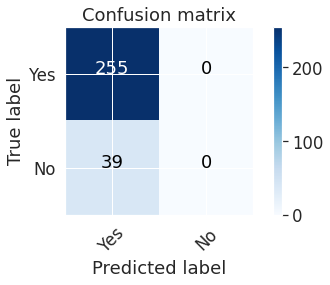

In [47]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

In [48]:
X1 = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X1[0:5]

array([[ 0.45,  0.59,  0.74,  1.4 , -1.01, -0.89, -0.94, -1.7 , -0.66,
        -1.22,  1.38,  0.38, -0.06,  1.03,  1.15,  1.24, -0.11,  0.73,
         2.13,  1.59, -1.15, -0.43, -1.58, -0.93, -0.42, -2.17, -2.49,
        -0.16, -0.06, -0.68,  0.25],
       [ 1.32, -0.91, -1.3 , -0.49, -0.15, -1.87, -0.94, -1.7 ,  0.25,
         0.82, -0.24, -1.03, -0.06,  0.63, -0.66, -0.13, -0.29,  1.49,
        -0.68, -0.63,  2.13,  2.35,  1.19,  0.24, -0.16,  0.16,  0.34,
         0.49,  0.76, -0.37,  0.81],
       [ 0.01,  0.59,  1.41, -0.49, -0.89, -0.89,  1.32, -1.7 ,  1.17,
         0.82,  1.28, -1.03, -0.96, -1.  ,  0.25,  1.24, -0.94, -1.67,
         1.32,  1.59, -0.06, -0.43, -0.66, -0.93, -0.55,  0.16,  0.34,
        -1.14, -1.17, -0.68, -1.16],
       [-0.43, -0.91,  1.46, -0.49, -0.76,  1.06, -0.94, -1.69,  1.17,
        -1.22, -0.49,  0.38, -0.96,  0.63,  0.25, -0.13, -0.76,  1.24,
        -0.68,  1.59, -1.15, -0.43,  0.27, -0.93, -0.42,  0.16,  0.34,
         0.16,  0.76,  0.25, -1.16],


In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)

In [50]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
yhat1 = clf.predict(X_test1)
print('predict:', yhat1[0:5])
print('actual:', y_test1[0:5])

predict: [0 0 0 0 0]
actual: 1041    0
184     0
1222    1
67      0
220     0
Name: Attrition, dtype: int64


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       631
           1       0.00      0.00      0.00       104

    accuracy                           0.86       735
   macro avg       0.43      0.50      0.46       735
weighted avg       0.74      0.86      0.79       735

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


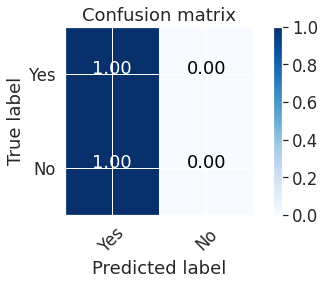

In [52]:
cnf_matrix = confusion_matrix(y_test1, yhat1, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test1, yhat1))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= True,  title='Confusion matrix')

##**Information**
As we can see **SVM** modeling using train:test (80:20) has an accuracy of 0.87 greater than **SVM** modeling using train:test (50:50) with normalization (accuracy 0.86 ). But, this result is better than using a **Decision Tree**. So we can conclude that we prefer to use **SVM** instead of **Decision Tree** for our data.